# Exploratory Data Analysis 

--------

### Description of Dataset:



**Input Variables:**

x1: Relative Compactness: Represents the relative compactness of a residential building.

x2: Surface Area: Indicates the surface area of the building.

x3: Wall Area: Refers to the total area of the walls in the building.

x4: Roof Area: Represents the total area of the roof in the building.

x5: Overall Height: Indicates the overall height of the building.

x6: Orientation: Represents the orientation of the building.

x7: Glazing Area: Refers to the area of glazing (windows) in the building.

x8: Glazing Area Distribution: Represents the distribution of glazing area in the building.

**Output Variables:**

y1: Heating Load (HL): Refers to the amount of heating load required for the building.

y2: Cooling Load (CL): Indicates the amount of cooling load required for the building.

In [20]:
# Important Libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# code to disable non fetal warnings:
import warnings
warnings.filterwarnings('ignore')

In [4]:
path_to_data = '/home/omkar/Omkar Pawar/Data Science/Projects/Energy_Efficiency/notebooks/data /ENB2012_data.xlsx'

df = pd.read_excel(path_to_data)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
# changing the column names: 
new_names = {"X1": "Relative Compactness","X2": "Surface Area", "X3": "Wall Area", "X4": "Roof Area", "X5": "Overall Height", 
             "X6": "Orientation", "X7": "Glazing Area", "X8": "Glazing Area Distribution", "Y1": "Heating Load", "Y2": "Cooling Load"}
df = df.rename(columns=new_names)

df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
# looking for null values:

df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

There are no null values in our data set. 

In [10]:
# looking for duplicates:

df[df.duplicated() == True]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load


There are no duplicate values in our data set either. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [15]:
df.shape

(768, 10)

In [26]:
df['Overall Height'].unique() 

array([7. , 3.5])

We have data for buildings with two different heights only.

In [16]:
df['Glazing Area Distribution'].unique()

array([0, 1, 2, 3, 4, 5])

In [13]:
df['Orientation'].unique() # this looks like categorical features with direction

# east, west, north, south like that...

array([2, 3, 4, 5])

In [14]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [28]:
# separating categorical and numerical variables

numerical_col = df.drop(labels="Orientation", axis=1)
categorical_col = df['Orientation']

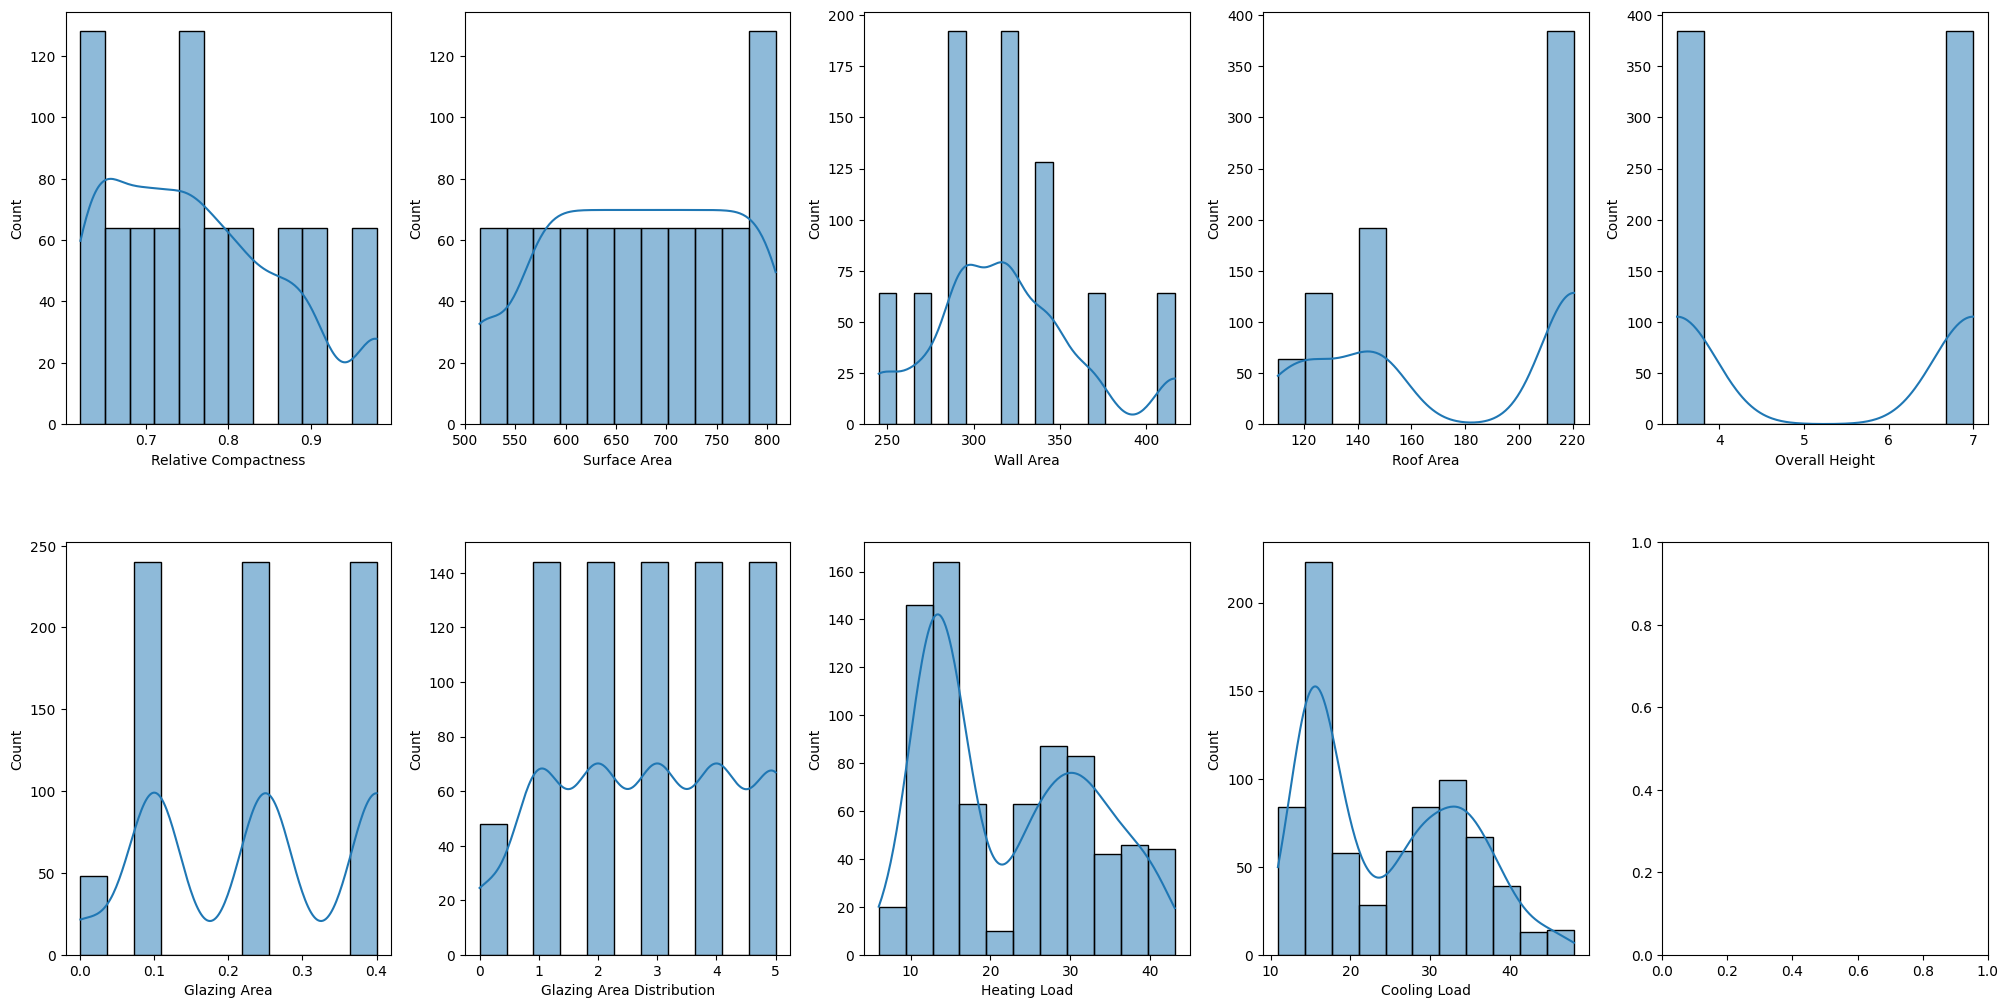

In [32]:

fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in numerical_col.items():
    sns.histplot(v, ax=axs[index], kde=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [41]:
# visualizing categorical variables:

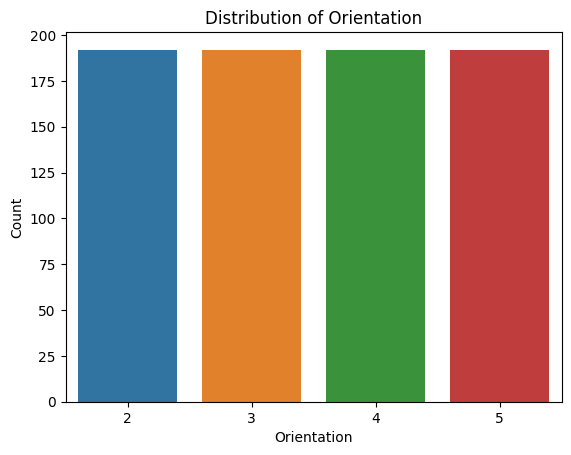

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot countplot
sns.countplot(data=df, x="Orientation")

# Add labels and title
plt.xlabel("Orientation")
plt.ylabel("Count")
plt.title("Distribution of Orientation")

# Display the plot
plt.show()

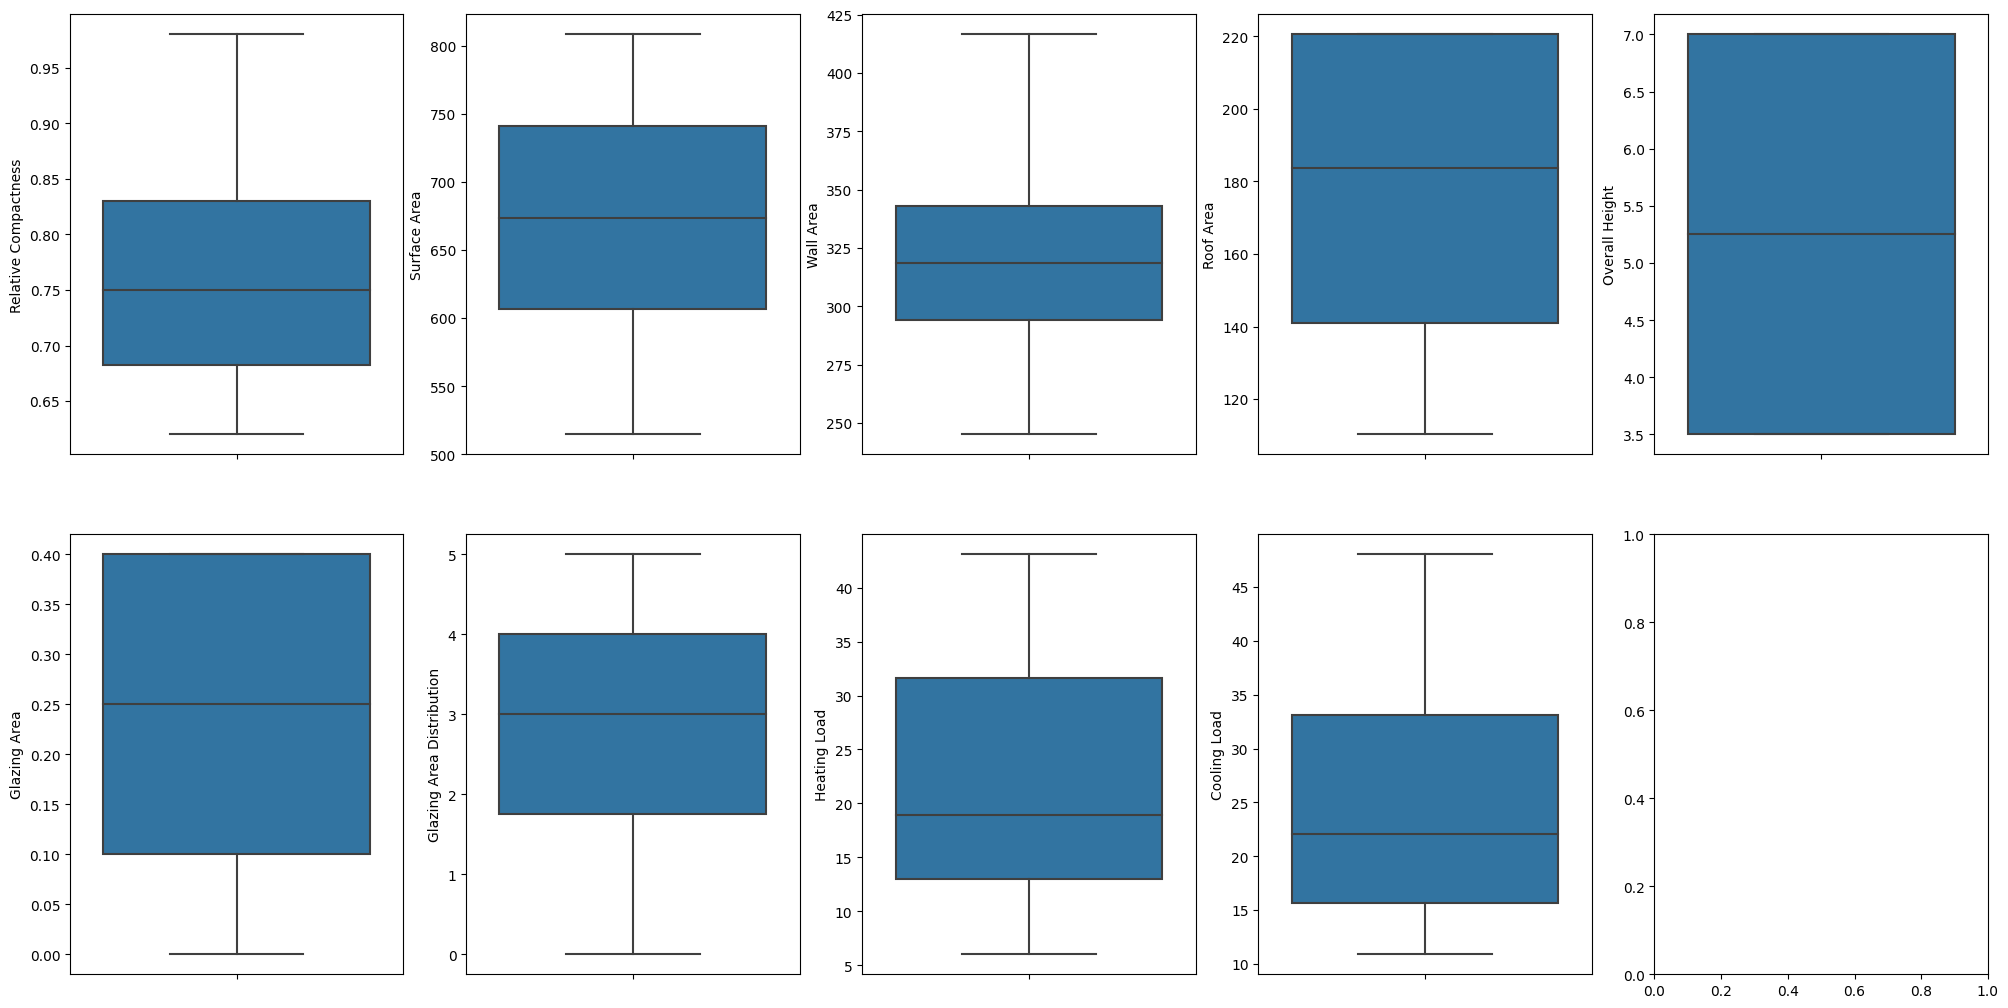

In [40]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in numerical_col.items():
    sns.boxplot(y=k, data=numerical_col, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

From above visualization we can clearly see that we don't have any outliers in our dataset.

In [42]:
# Plotting Heat Map to see the Correlation Variables:

<Axes: >

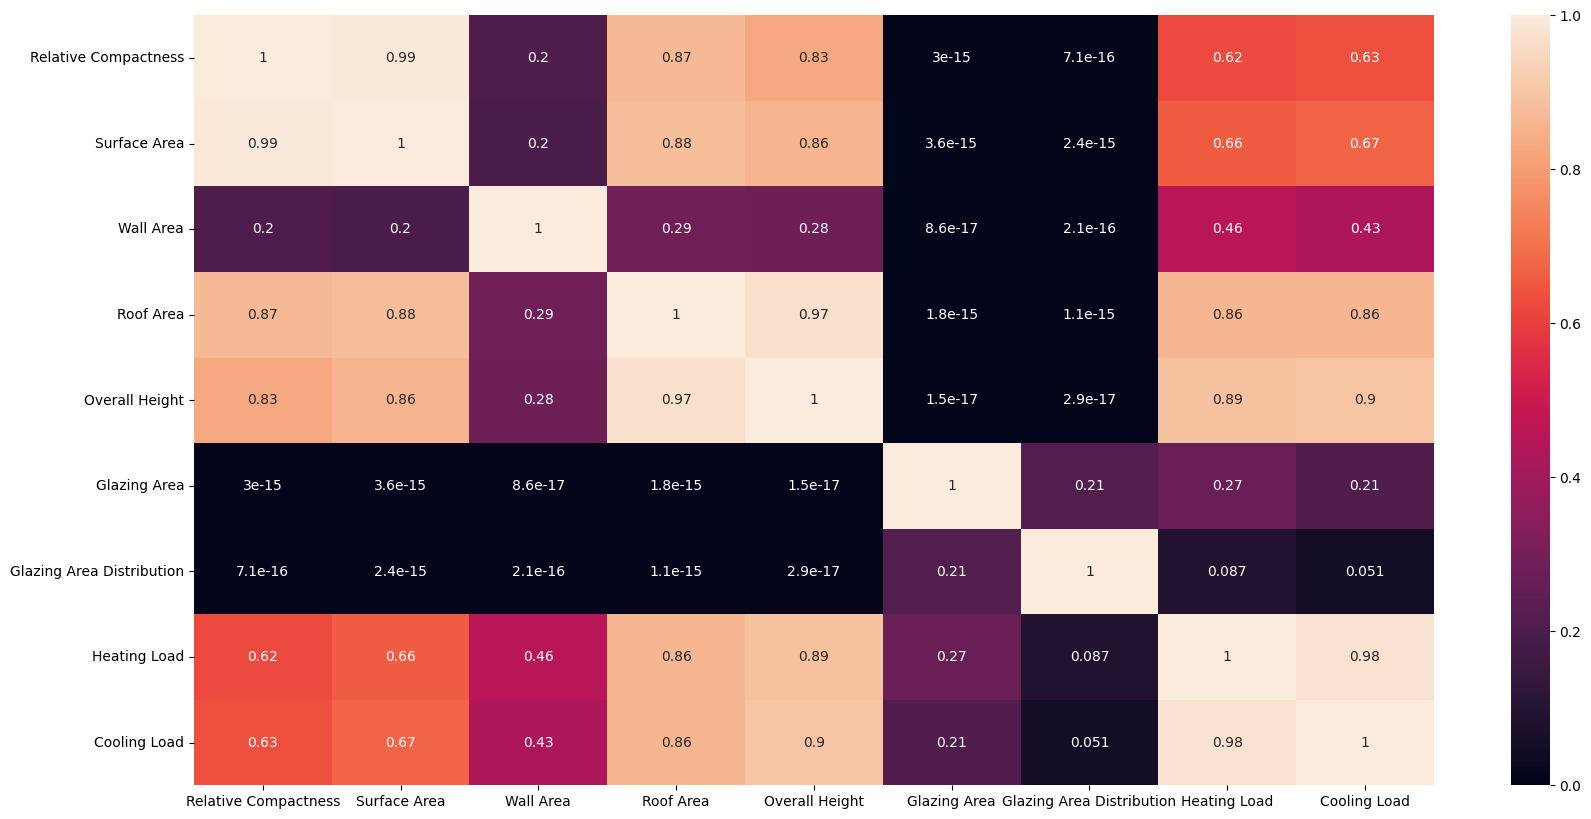

In [44]:
plt.figure(figsize=(20, 10))
sns.heatmap(numerical_col.corr().abs(),  annot=True)

* Overall Height and Roof Area is highly positively correlated with Heating Load and Cooling Load.
* Relative Compactness, Surface Area, Wall Area are positively correlated with Heating Load and Cooling Load.
* Glazing Area and Glazing Area Distribution are not correlated with Heating Load and Cooling Load.

In [46]:
"""

-1 to 1 
0 zero correlation 
-1 ... negative correlation
1... positive correlation 

"""

'-1 to 1 \n0 zero correlation \n-1 ... negative correlation\n1... positive correlation '

In [54]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [56]:
independent_var = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area','Glazing Area Distribution']

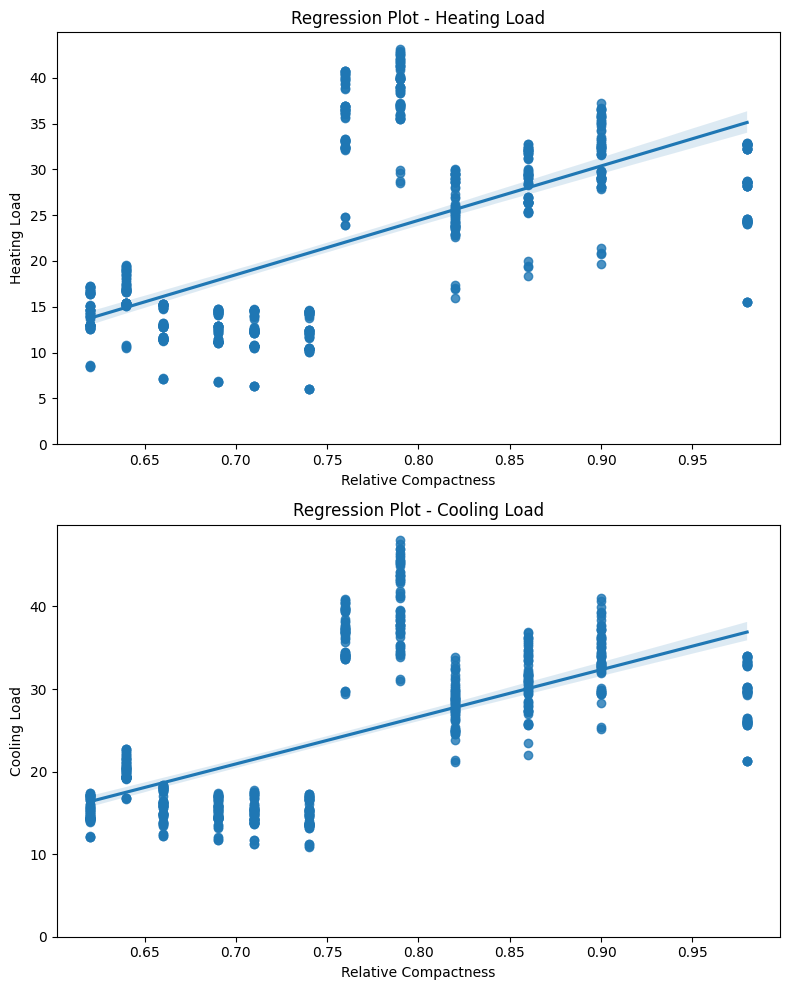

Correlation (Relative Compactness vs. Heating Load): 0.6222719356777707
Correlation (Relative Compactness vs. Cooling Load): 0.6343390663353596
----------------------------------------------------------------


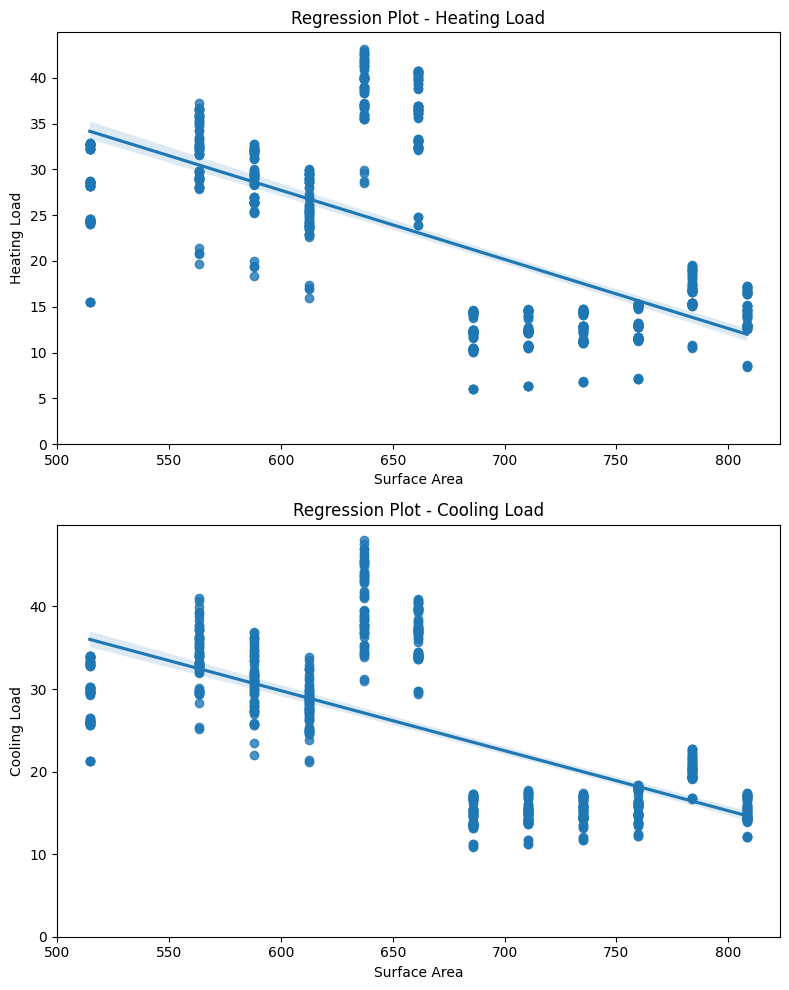

Correlation (Surface Area vs. Heating Load): -0.658119917065421
Correlation (Surface Area vs. Cooling Load): -0.6729989333544866
----------------------------------------------------------------


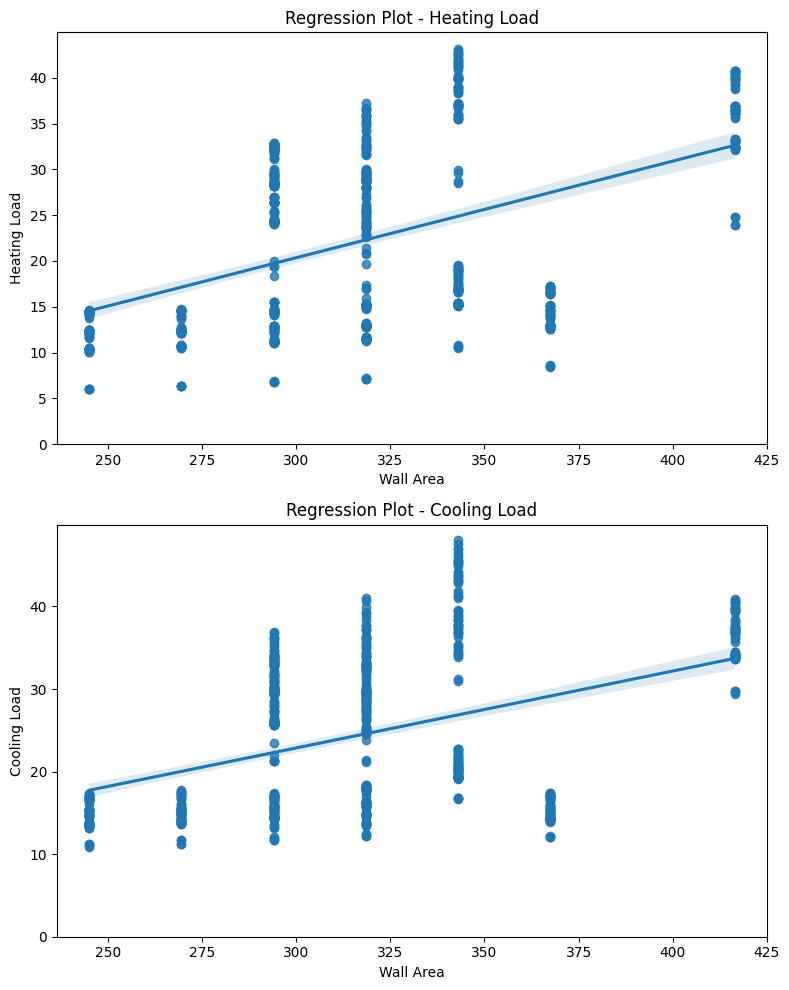

Correlation (Wall Area vs. Heating Load): 0.4556713653752271
Correlation (Wall Area vs. Cooling Load): 0.42711699766713335
----------------------------------------------------------------


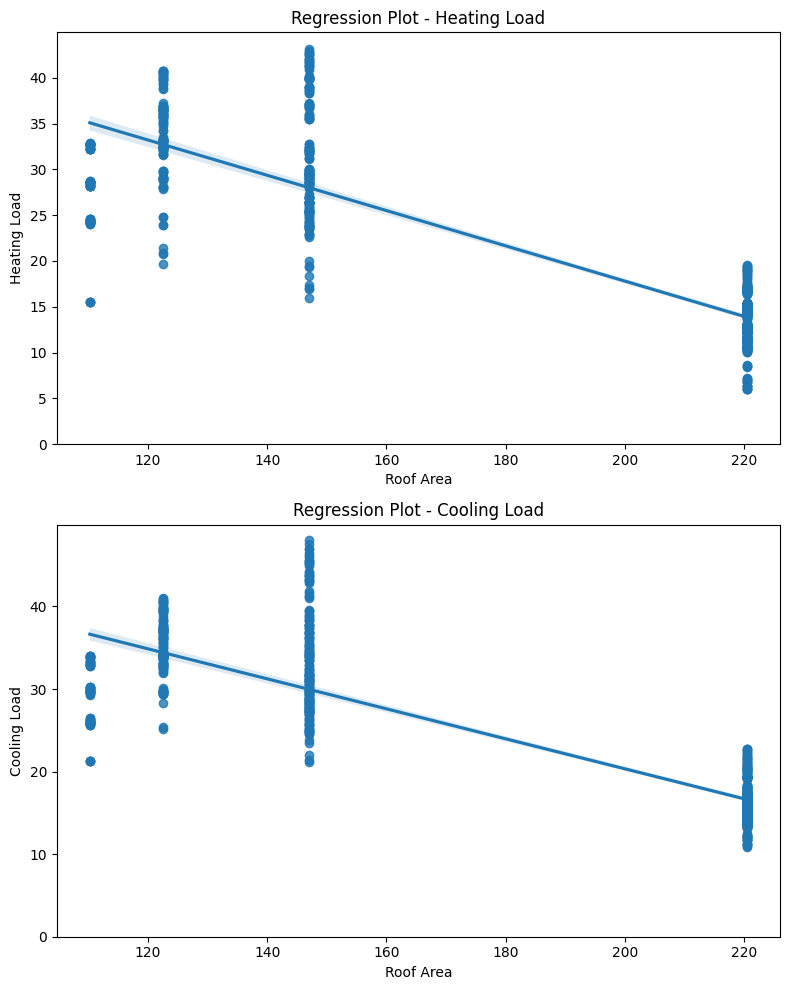

Correlation (Roof Area vs. Heating Load): -0.8618280515790451
Correlation (Roof Area vs. Cooling Load): -0.8625466035249761
----------------------------------------------------------------


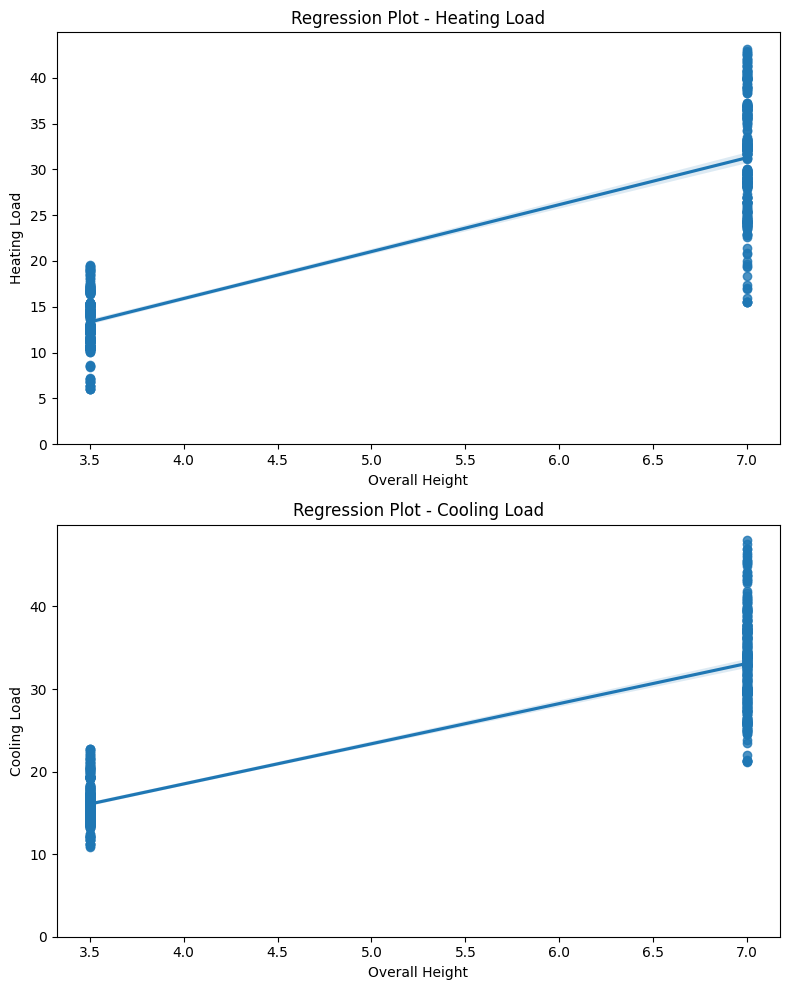

Correlation (Overall Height vs. Heating Load): 0.8894304644356398
Correlation (Overall Height vs. Cooling Load): 0.89578516889245
----------------------------------------------------------------


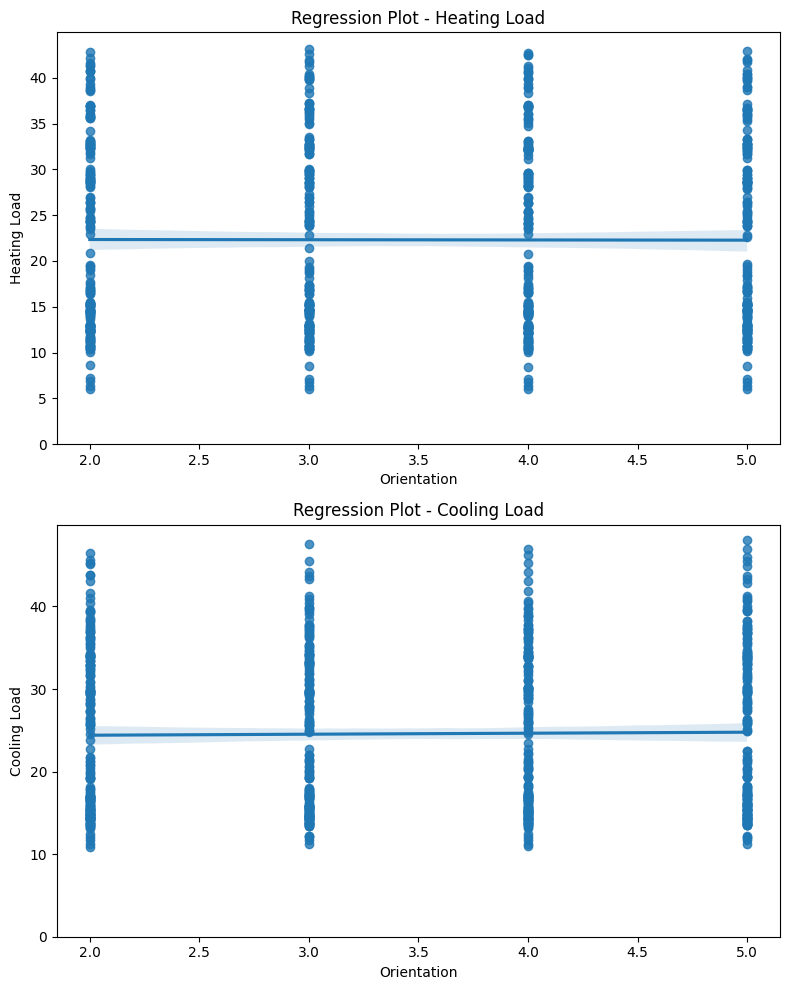

Correlation (Orientation vs. Heating Load): -0.002586762795754807
Correlation (Orientation vs. Cooling Load): 0.01428959757617022
----------------------------------------------------------------


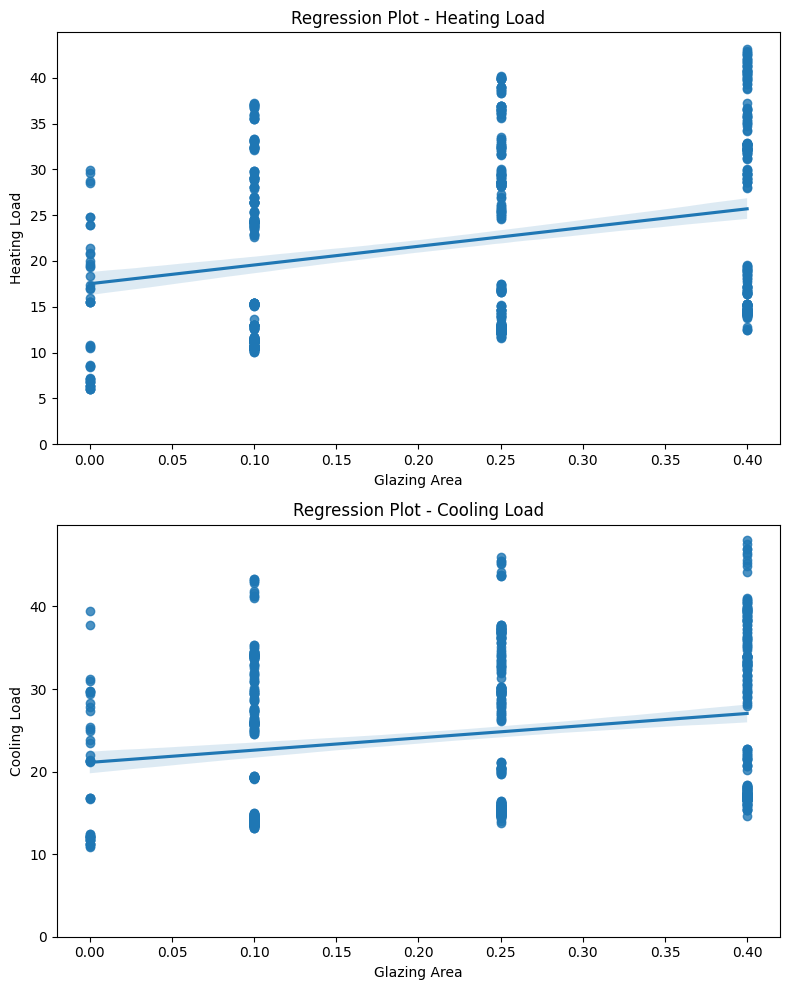

Correlation (Glazing Area vs. Heating Load): 0.26984168530283736
Correlation (Glazing Area vs. Cooling Load): 0.20750499116036228
----------------------------------------------------------------


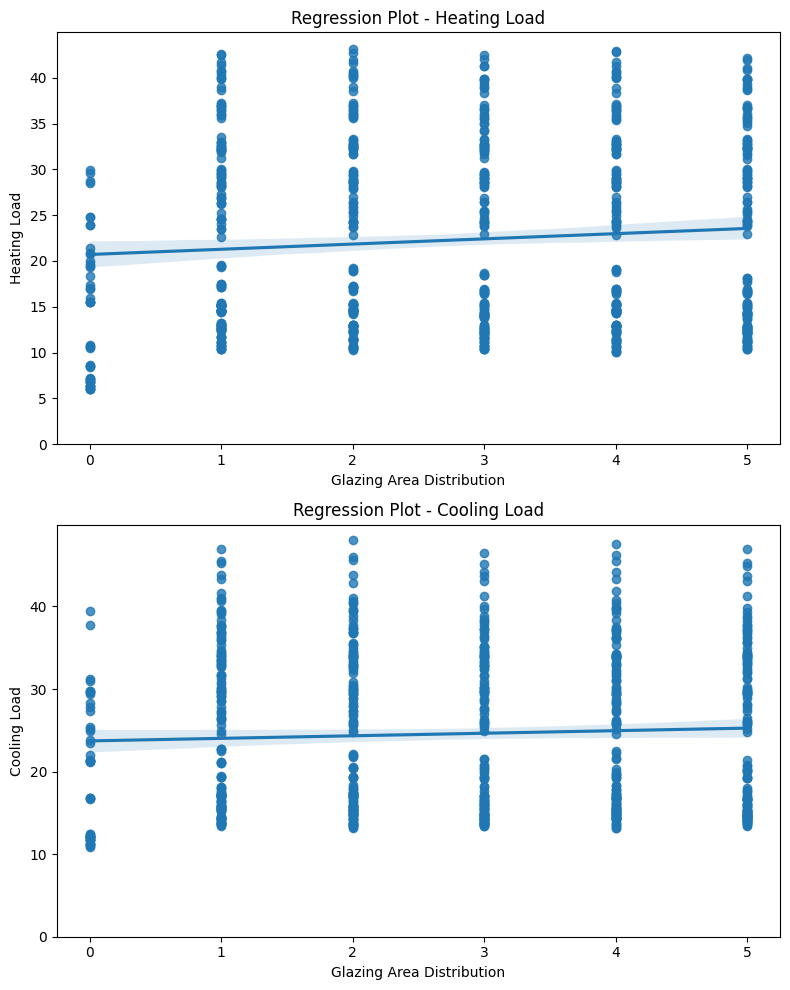

Correlation (Glazing Area Distribution vs. Heating Load): 0.08736845962961992
Correlation (Glazing Area Distribution vs. Cooling Load): 0.05052511880567567
----------------------------------------------------------------


In [64]:
for i in independent_var:
    # Create a new figure and axis for each plot
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
    
    # Plot regression plot for 'Heating Load'
    sns.regplot(data=df, x=i, y='Heating Load', ax=axes[0])
    axes[0].set_ylim(0, )
    axes[0].set_title('Regression Plot - Heating Load')
    
    # Plot regression plot for 'Cooling Load'
    sns.regplot(data=df, x=i, y='Cooling Load', ax=axes[1])
    axes[1].set_ylim(0, )
    axes[1].set_title('Regression Plot - Cooling Load')
    
    # Set spacing between subplots
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print the correlation between the independent variable and 'Heating Load'
    print(f"Correlation ({i} vs. Heating Load): {df[i].corr(df['Heating Load'])}")
    
    # Print the correlation between the independent variable and 'Cooling Load'
    print(f"Correlation ({i} vs. Cooling Load): {df[i].corr(df['Cooling Load'])}")
    
    # Print a separator line between iterations
    print("----------------------------------------------------------------")

# Building Model: